# **Logistic Regression**

## **What is Logistic Regression?**

Logistic Regression is a *supervised learning algorithm* used for *binary classification* problems. Despite its name, it is a classification algorithm, not a regression one. It estimates the probability that a given input belongs to a particular class using the logistic (sigmoid) function.<br/><br/>

-------------------------------------------

## **What Does It Do?**

- Logistic Regression models the relationship between input features ($X$) and a binary outcome ($Y$) by fitting a sigmoid curve.

- The model outputs a probability score (between 0 and 1), which is then thresholded (e.g., at 0.5) to classify inputs into two categories.

- The logistic function (i.e., sigmoid function) is given by
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
where $z$ is a **linear combination** of input features
$$z = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n$$

- Thus, the probability that an instance belongs to class 1 is
$$\mathbb{P}(Y = 1 | X) = \frac{1}{1 + e^{-(w_0 \ + \ w_1 x_1 \ + \ w_2 x_2 \ + \ \ldots \ + \ w_n x_n)}}$$
where $w$ represents the learned weights (coefficients).<br/><br/>

<p align="center">
  <img width="500" src="https://zd-brightspot.s3.us-east-1.amazonaws.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png" alt="Logistic Regression Image" />
</p>


-------------------------------------------

## **Logistic Regression Applications**

- **Medical Diagnosis** — Predicting disease presence (e.g., cancer detection).
- **Fraud Detection** — Identifying fraudulent transactions.
- **Spam Filtering** — Classifying emails as spam or not.
- **Customer Churn Prediction** — Predicting whether a customer will leave a service.
- etc.<br/><br/>

-------------------------------------------

## **Advantages and Limitations of Logistic Regression**

- ✅ **Simple and Interpretable** — Easy to understand and interpret results.
- ✅ **Efficient for Small Datasets** — Performs well with limited data.
- ✅ **Outputs Probabilities** — Useful for decision-making based on confidence levels.<br/>

- ❌ **Assumes Linearity** — Assumes a linear relationship between input features and the log-odds.

- ❌ **Not Suitable for Non-Linear Data** — Struggles with complex, non-linear relationships.

- ❌ **Sensitive to Outliers** — Affected by extreme values in the data.

- ❌ **Limited to Binary Classification** — Extensions like Multinomial Logistic Regression are needed for multi-class problems.

-------------------------------------------

## **Coding Part**

We'll use the Breast Cancer dataset since it's a binary classification problem.

### **Steps:**

1. Load the dataset (`sklearn.datasets`).

2. Preprocess the data (normalize and convert to tensors).

3. Define a Logistic Regression model in PyTorch.

4. Use **Maximum Likelihood Estimation (MLE)** (which is equivalent to minimizing Binary Cross-Entropy Loss).

5. Train the model using gradient descent (SGD/Adam).

6. Evaluate the model on the test set.

In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Load the dataset (binary classification problem)
data = datasets.load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 or 1)

In [100]:
X.shape, y.shape

((569, 30), (569,))

In [101]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0


In [102]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


In [103]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [105]:
# Normalize the features (important for gradient-based optimization) to be mean=0 and std=1 for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
pd.DataFrame(X_train).mean()[:3], pd.DataFrame(X_train).std()[:3]

(0   -0.00
 1   -0.00
 2   -0.00
 dtype: float64,
 0   1.00
 1   1.00
 2   1.00
 dtype: float64)

In [107]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Convert to column vector

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)  # Convert to column vector

In [108]:
# Define Logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Single neuron for binary classification (Fully Connected layer)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid to get probability

In [109]:
# Initialize the model
input_dim = X_train.shape[1]  # Number of features
model = LogisticRegression(input_dim)

In [110]:
# Define loss function (Binary Cross-Entropy, equivalent to Negative Log-Likelihood for Logistic Regression)
criterion = nn.BCELoss()

In [111]:
# Define optimizer (MLE is solved via gradient descent)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [112]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    y_pred = model(X_train_tensor)

    # Compute loss
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass (compute gradients)
    optimizer.zero_grad()
    loss.backward()

    # Update parameters
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1014
Epoch [200/1000], Loss: 0.0792
Epoch [300/1000], Loss: 0.0694
Epoch [400/1000], Loss: 0.0637
Epoch [500/1000], Loss: 0.0598
Epoch [600/1000], Loss: 0.0571
Epoch [700/1000], Loss: 0.0550
Epoch [800/1000], Loss: 0.0533
Epoch [900/1000], Loss: 0.0519
Epoch [1000/1000], Loss: 0.0507


In [113]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = (y_pred_test >= 0.5).float()  # Convert probabilities to binary labels (>= 0.5 → 1, else 0)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_labels.numpy())

    # Compute ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_test.numpy())
    roc_auc = auc(fpr, tpr)

    # Print accuracy
    accuracy = (y_pred_labels.eq(y_test_tensor).sum().item()) / y_test_tensor.shape[0]
    print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.9825


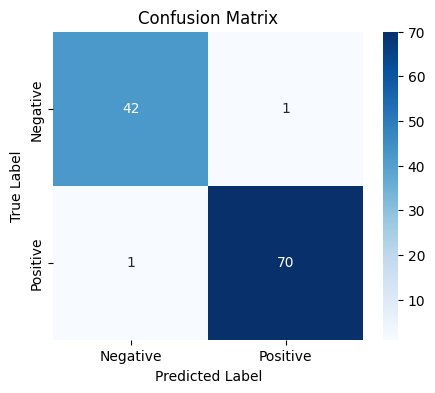

In [114]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

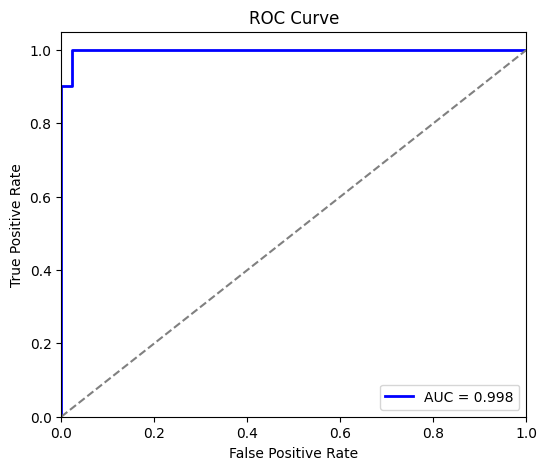

In [115]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()